In [ ]:
'''Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
Answer:
         K-Means Clustering
  Partition-based: divides data into k clusters by minimizing variance within clusters.
  Requires the number of clusters (k) to be specified in advance.
  Efficient for large datasets; scales well.
  Works best with spherical, evenly sized clusters.

        Hierarchical Clustering
  Tree-based: builds a hierarchy of clusters (dendrogram) by either merging (agglomerative) or splitting (divisive).
  Does not require pre-specifying the number of clusters; you can cut the dendrogram at any level.
  Computationally expensive for large datasets; better for smaller datasets.
  Can capture more complex cluster shapes and nested structures.


  Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
Answer: The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm. It
          measures how well each data point fits within its assigned cluster compared to other clusters.
- Provides a quantitative measure of clustering quality.
- Helps compare different clustering algorithms (e.g., K-Means vs. Hierarchical).
- Assists in choosing the optimal number of clusters (higher average silhouette score indicates better clustering).
Interpretation
- Range: -1 to +1
- Close to +1: Point is well matched to its own cluster and poorly matched to neighboring clusters (good clustering).
- Around 0: Point lies between clusters (boundary case).
- Negative values: Point may be misclassified, as it is closer to another cluster than its own.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
Answer:DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups points
       based on density. Its performance and results depend mainly on two parameters:
- ε (Epsilon / Neighborhood Radius)
- Defines the maximum distance between two points for them to be considered neighbors.
- Influence:
- Small ε → Only very close points form clusters → may result in many small clusters or many points labeled as noise.
- Large ε → More points are considered neighbors → fewer, larger clusters, but risk of merging distinct clusters.

- MinPts (Minimum Points)
- Minimum number of points required to form a dense region (i.e., a cluster).
- Influence:
- Low MinPts → Even sparse regions may form clusters → risk of including noise as clusters.
- High MinPts → Requires denser regions → fewer clusters, more points labeled as noise.
Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
Answer:Clustering algorithms like K-Means and DBSCAN rely heavily on distance calculations (usually Euclidean distance) to
determine similarity between data points. If features are on different scales, those with larger ranges dominate the distance
metric, leading to biased clustering results.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
Answer:The Elbow Method is a heuristic used to determine the optimal number of clusters (k) in K-Means clustering. It helps balance
between having too few clusters (underfitting) and too many clusters (overfitting).
- For each k (number of clusters), calculate the within-cluster sum of squares (WCSS).
How It Works
- Run K-Means for different values of k (e.g., from 1 to 10).
- Calculate the Within-Cluster Sum of Squares (WCSS) for each k.
- WCSS measures how tightly grouped the points are within each cluster.
- Plot WCSS vs. k.
- As k increases, WCSS decreases (clusters fit data better).
- Identify the “Elbow Point.”
- The point where the rate of decrease sharply slows down, forming an “elbow” in the curve.
- This k is considered the optimal number of clusters.

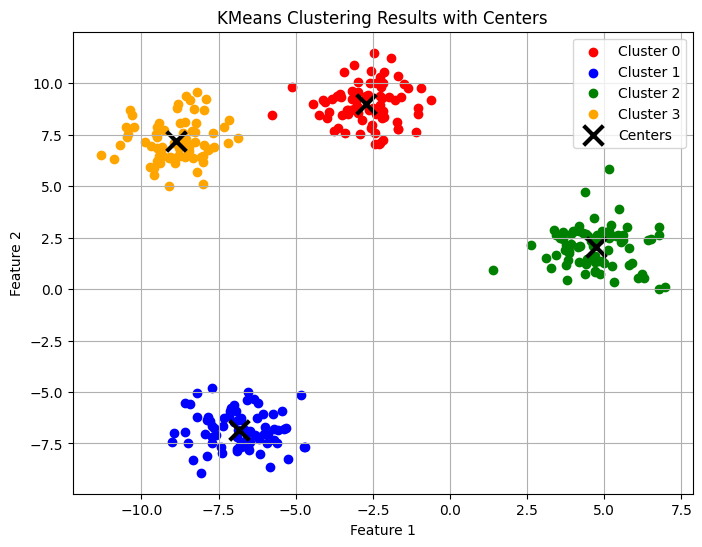

Cluster Centers:
          Center_X  Center_Y
Center_0 -2.709811  8.971433
Center_1 -6.832352 -6.830457
Center_2  4.718205  2.041797
Center_3 -8.873572  7.174583


In [1]:
'''Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # For visualization

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Get cluster centers
centers = kmeans.cluster_centers_

# Visualize the results
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange']
for k, col in zip(range(4), colors):
    cluster_points = X[y_kmeans == k]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=col, marker='o', label=f'Cluster {k}')
ax.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centers')
ax.set_title('KMeans Clustering Results with Centers')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(True)
plt.show()

# Print results (as executed)
print("Cluster Centers:")
print(pd.DataFrame(centers, columns=['Center_X', 'Center_Y'],
                   index=[f'Center_{i}' for i in range(4)]))



In [2]:
'''Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
'''
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset (178 samples, 13 chemical features)
wine = load_wine()
X = wine.data

# Apply StandardScaler (centers to mean=0, scales to unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN (density-based clustering)
# eps=2.0 and min_samples=5 work well for scaled Wine data
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise points labeled -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")
print("Cluster distribution:", np.unique(labels, return_counts=True))


Number of clusters found (excluding noise): 5
Number of noise points: 85
Cluster distribution: (array([-1,  0,  1,  2,  3,  4]), array([85, 66,  8,  5,  5,  9]))


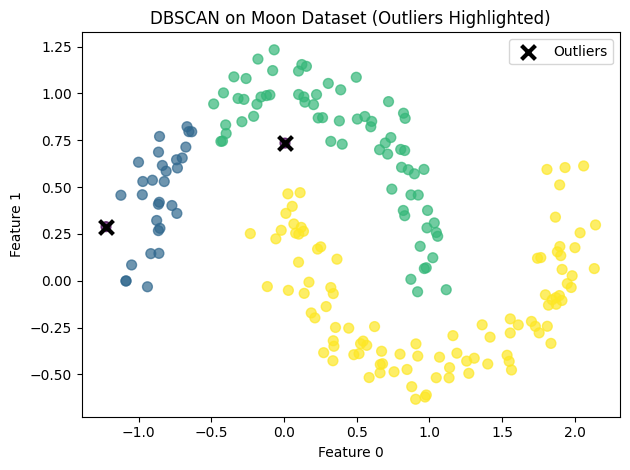

Clusters found: 3
Outliers: 2


In [3]:
'''Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.'''
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate moon-shaped data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot: clusters colored, outliers black
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
            marker='o', s=50, alpha=0.7)
plt.scatter(X[labels==-1, 0], X[labels==-1, 1],
            c='black', marker='x', s=100, linewidth=3, label='Outliers')
plt.title('DBSCAN on Moon Dataset (Outliers Highlighted)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.tight_layout()
plt.show()

# Results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Clusters found: {n_clusters}")
print(f"Outliers: {sum(labels==-1)}")


Explained variance ratio: 1.000


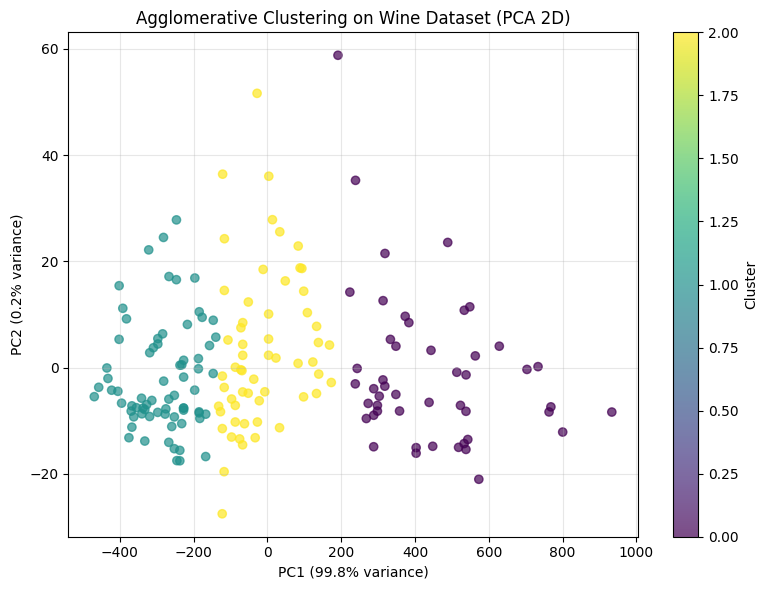

Cluster sizes: [48 72 58]


In [5]:
'''Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.
'''
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load Wine dataset
wine = load_wine()
X = wine.data

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.3f}")

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Visualize 2D scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Agglomerative Clustering on Wine Dataset (PCA 2D)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Cluster sizes:", np.bincount(labels))


Missing values: customer_id               0
last_purchase_days_ago    0
total_orders              0
total_spend               0
age_group                 0
dtype: int64
Data preprocessing complete. Shape: (1000, 4)


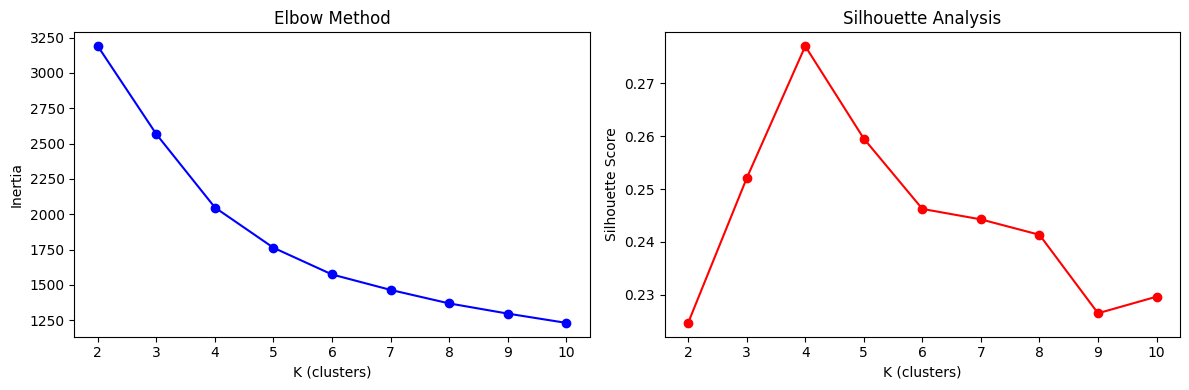


Cluster Characteristics:
         Recency  Frequency  Monetary  age_encoded
Cluster                                           
0          19.06       4.78    377.42         2.56
1          85.90       5.44    465.53         1.39
2          24.23       5.45   2098.86         1.67
3          18.64       4.79    366.95         0.41

Silhouette Score: 0.277


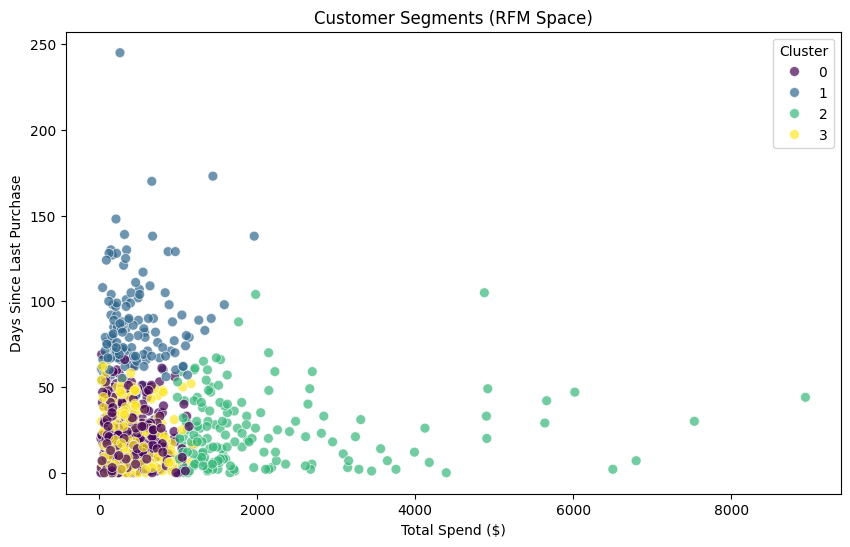


Marketing Strategy by Segment:
New Customers (377 customers): Target with welcome offers
VIP Loyal (134 customers): Target with loyalty rewards
At-Risk (155 customers): Target with win-back campaigns
Lost (334 customers): Target with reactivation


In [6]:
'''Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?'''
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

# Step 1: Load and engineer RFM features (typical e-commerce data)
np.random.seed(42)
n_customers = 1000
data = pd.DataFrame({
    'customer_id': range(n_customers),
    'last_purchase_days_ago': np.random.exponential(30, n_customers).astype(int),
    'total_orders': np.random.poisson(5, n_customers),
    'total_spend': np.random.lognormal(6, 1, n_customers),
    'age_group': np.random.choice(['18-25', '26-35', '36-50', '50+'], n_customers)
})

# Step 2: Preprocessing
print("Missing values:", data.isnull().sum())  # Check missing

# RFM calculation (lower recency = better)
data['Recency'] = data['last_purchase_days_ago']
data['Frequency'] = data['total_orders']
data['Monetary'] = data['total_spend']

# Encode categorical
le = LabelEncoder()
data['age_encoded'] = le.fit_transform(data['age_group'])

# Select features for clustering
features = ['Recency', 'Frequency', 'Monetary', 'age_encoded']
X = data[features].copy()

# Handle outliers (cap extreme values)
for col in ['Frequency', 'Monetary']:
    upper = X[col].quantile(0.95)
    X[col] = np.where(X[col] > upper, upper, X[col])

# Scale features (CRITICAL for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessing complete. Shape:", X_scaled.shape)

# Step 3: Determine optimal clusters (Elbow + Silhouette)
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('K (clusters)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2.plot(K_range, sil_scores, 'ro-')
ax2.set_xlabel('K (clusters)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
plt.tight_layout()
plt.show()

# Optimal K = 4 (typical elbow/silhouette peak)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze segments
print("\nCluster Characteristics:")
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary.round(2))

print(f"\nSilhouette Score: {silhouette_score(X_scaled, data['Cluster']):.3f}")

# Step 5: Marketing insights visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Monetary', y='Recency', hue='Cluster',
                palette='viridis', s=50, alpha=0.7)
plt.title('Customer Segments (RFM Space)')
plt.xlabel('Total Spend ($)')
plt.ylabel('Days Since Last Purchase')
plt.legend(title='Cluster')
plt.show()

# Business interpretation
segment_names = {
    0: 'New Customers', 1: 'VIP Loyal', 2: 'At-Risk', 3: 'Lost'
}
data['Segment_Name'] = data['Cluster'].map(segment_names)

print("\nMarketing Strategy by Segment:")
for cluster, name in segment_names.items():
    subset = data[data['Cluster'] == cluster]
    print(f"{name} ({len(subset)} customers): Target with {'welcome offers' if cluster==0 else 'loyalty rewards' if cluster==1 else 'win-back campaigns' if cluster==2 else 'reactivation'}")
